In [2]:
# TITANIC DATASET 
# task type: Classification

# imports
import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

# make sure warnings are shown (problem in vscode)
# import warnings
# warnings.simplefilter(action="default")

# load data
trData = pd.read_csv("train.csv",sep=",") 
teData = pd.read_csv("test.csv", sep=",")

In [3]:
# DATA FOR VISUALIZATIONS #1
# separate passanger on age and correlate with gender, class, embarkment point and family members

# age intervals
ageBins = np.arange(0,81,5,dtype=int)
# overall (last bin for NaN age)
ovA = np.empty(len(ageBins))
ovD = np.empty(len(ageBins))
# males
maA = np.empty(len(ageBins))
maD = np.empty(len(ageBins))
# females
feA = np.empty(len(ageBins))
feD = np.empty(len(ageBins))
# first class
fiA = np.empty(len(ageBins))
fiD = np.empty(len(ageBins))
# second class
seA = np.empty(len(ageBins))
seD = np.empty(len(ageBins))
# third class
thA = np.empty(len(ageBins))
thD = np.empty(len(ageBins))

labels = []

for i in range(ageBins.size-1):
    # overall
    ovA[i] = len(trData[(trData["Survived"]==1) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1])])
    ovD[i] = len(trData[(trData["Survived"]==0) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1])])
    # males
    maA[i] = len(trData[(trData["Survived"]==1) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1]) & trData["Sex"].str.match("male")])
    maD[i] = len(trData[(trData["Survived"]==0) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1]) & trData["Sex"].str.match("male")])
    # females
    feA[i] = len(trData[(trData["Survived"]==1) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1]) & trData["Sex"].str.match("female")])
    feD[i] = len(trData[(trData["Survived"]==0) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1]) & trData["Sex"].str.match("female")])
    # first class
    fiA[i] = len(trData[(trData["Survived"]==1) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1]) & (trData["Pclass"]==1)])
    fiD[i] = len(trData[(trData["Survived"]==0) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1]) & (trData["Pclass"]==1)])
    # second class
    seA[i] = len(trData[(trData["Survived"]==1) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1]) & (trData["Pclass"]==2)])
    seD[i] = len(trData[(trData["Survived"]==0) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1]) & (trData["Pclass"]==2)])   
    # third class
    thA[i] = len(trData[(trData["Survived"]==1) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1]) & (trData["Pclass"]==3)])
    thD[i] = len(trData[(trData["Survived"]==0) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1]) & (trData["Pclass"]==3)])
    # labels for plot
    labels.append(str(ageBins[i]) + "-" + str(ageBins[i+1]))

# age = NaN values
ovA[-1] = len(trData[(trData["Survived"]==1) & (trData["Age"].isna())])
ovD[-1] = len(trData[(trData["Survived"]==0) & (trData["Age"].isna())])
maA[-1] = len(trData[(trData["Survived"]==1) & (trData["Age"].isna()) & (trData["Sex"].str.match("male"))])
maD[-1] = len(trData[(trData["Survived"]==0) & (trData["Age"].isna()) & (trData["Sex"].str.match("male"))])
feA[-1] = len(trData[(trData["Survived"]==1) & (trData["Age"].isna()) & (trData["Sex"].str.match("female"))])
feD[-1] = len(trData[(trData["Survived"]==0) & (trData["Age"].isna()) & (trData["Sex"].str.match("female"))])
fiA[-1] = len(trData[(trData["Survived"]==1) & (trData["Age"].isna()) & (trData["Pclass"]==1)])
fiD[-1] = len(trData[(trData["Survived"]==0) & (trData["Age"].isna()) & (trData["Pclass"]==1)])
seA[-1] = len(trData[(trData["Survived"]==1) & (trData["Age"].isna()) & (trData["Pclass"]==2)])
seD[-1] = len(trData[(trData["Survived"]==0) & (trData["Age"].isna()) & (trData["Pclass"]==2)])
thA[-1] = len(trData[(trData["Survived"]==1) & (trData["Age"].isna()) & (trData["Pclass"]==3)])
thD[-1] = len(trData[(trData["Survived"]==0) & (trData["Age"].isna()) & (trData["Pclass"]==3)])
labels.append("NaN")

# create dataframe
visData = pd.DataFrame({"labels":labels, "all_alive":ovA, "all_dead":ovD, "male_alive":maA, "male_dead":maD, "female_alive":feA,
                    "female_dead":feD, "first_alive":fiA, "first_dead":fiD, "second_alive":seA, "second_dead":seD,
                    "third_alive":thA, "third_dead":thD})

# delete useless variables
del labels, ovA, ovD, maA, maD, feA, feD, fiA, fiD, seA, seD, thA, thD, i

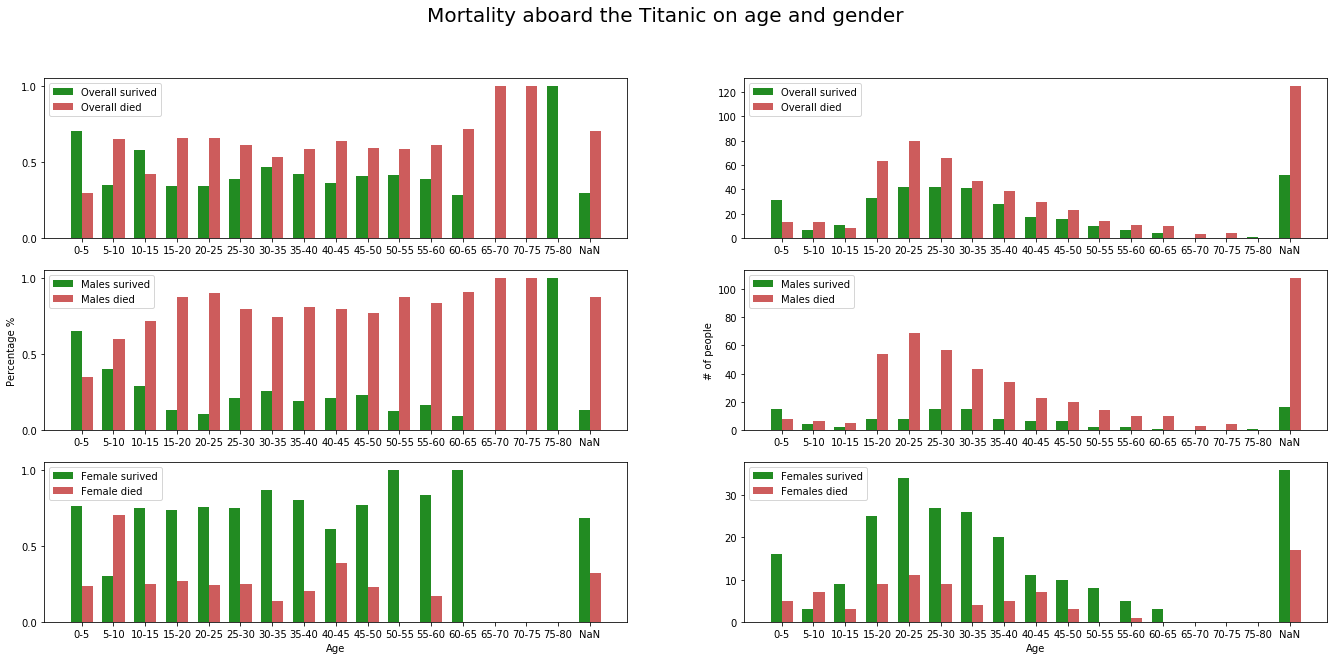

In [4]:
# DATA VISUALIZATION #1
# age: overall + gender

width = 0.35
x = np.arange(len(visData["labels"]))

fig, ax = plt.subplots(3, 2, figsize=(23,10))
fig.suptitle("Mortality aboard the Titanic on age and gender", fontsize=20)

# overall percentage
ax[0,0].bar(x - width/2, visData["all_alive"]/(visData["all_alive"]+visData["all_dead"]), width, label="Overall surived", color="forestgreen")
ax[0,0].bar(x + width/2, visData["all_dead"]/(visData["all_alive"]+visData["all_dead"]), width, label="Overall died", color="indianred")
ax[0,0].set(xticks=x, xticklabels=visData["labels"].values, yticks=[0,0.5,1])
ax[0,0].legend()
# overalls
ax[0,1].bar(x - width/2, visData["all_alive"], width, label="Overall surived", color="forestgreen")
ax[0,1].bar(x + width/2, visData["all_dead"], width, label="Overall died", color="indianred")
ax[0,1].set(xticks=x, xticklabels=visData["labels"].values)
ax[0,1].legend()
# male percentage
ax[1,0].bar(x - width/2, visData["male_alive"]/(visData["male_alive"]+visData["male_dead"]), width, label="Males surived", color="forestgreen")
ax[1,0].bar(x + width/2, visData["male_dead"]/(visData["male_alive"]+visData["male_dead"]), width, label="Males died", color="indianred")
ax[1,0].set(ylabel="Percentage %", xticks=x, xticklabels=visData["labels"].values, yticks=[0,0.5,1])
ax[1,0].legend()
# male
ax[1,1].bar(x - width/2, visData["male_alive"], width, label="Males surived", color="forestgreen")
ax[1,1].bar(x + width/2, visData["male_dead"], width, label="Males died", color="indianred")
ax[1,1].set(ylabel="# of people", xticks=x, xticklabels=visData["labels"].values)
ax[1,1].legend()
# female percentage
ax[2,0].bar(x - width/2, visData["female_alive"]/(visData["female_alive"]+visData["female_dead"]), width, label="Female surived", color="forestgreen")
ax[2,0].bar(x + width/2, visData["female_dead"]/(visData["female_alive"]+visData["female_dead"]), width, label="Female died", color="indianred")
ax[2,0].set(xlabel="Age", xticks=x, xticklabels=visData["labels"].values, yticks=[0,0.5,1])
ax[2,0].legend()
# female
ax[2,1].bar(x - width/2, visData["female_alive"], width, label="Females surived", color="forestgreen")
ax[2,1].bar(x + width/2, visData["female_dead"], width, label="Females died", color="indianred")
ax[2,1].set(xlabel="Age", xticks=x, xticklabels=visData["labels"].values)
ax[2,1].legend()

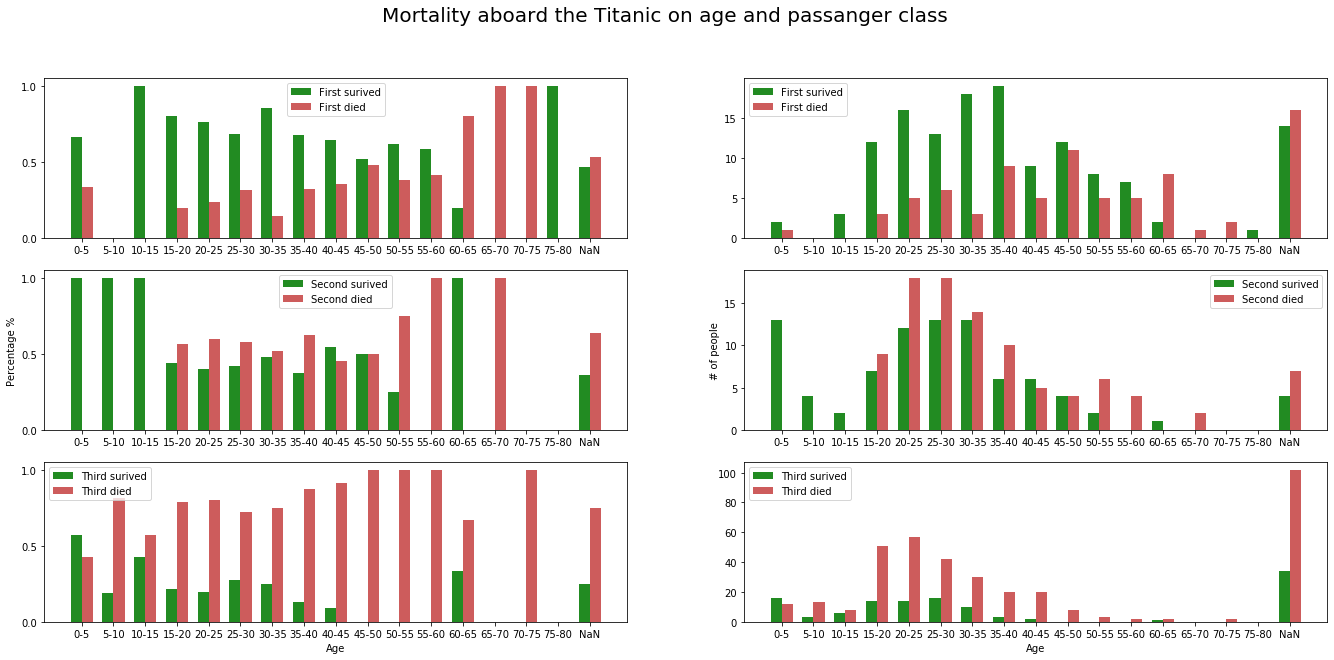

In [5]:
# DATA VISUALIZATION #2
# age + class

fig, ax = plt.subplots(3, 2, figsize=(23,10))
fig.suptitle("Mortality aboard the Titanic on age and passanger class", fontsize=20)

# first class percentage
ax[0,0].bar(x - width/2, visData["first_alive"]/(visData["first_alive"]+visData["first_dead"]), width, label="First surived", color="forestgreen")
ax[0,0].bar(x + width/2, visData["first_dead"]/(visData["first_alive"]+visData["first_dead"]), width, label="First died", color="indianred")
ax[0,0].set(xticks=x, xticklabels=visData["labels"].values, yticks=[0,0.5,1])
ax[0,0].legend()
# first
ax[0,1].bar(x - width/2, visData["first_alive"], width, label="First surived", color="forestgreen")
ax[0,1].bar(x + width/2, visData["first_dead"], width, label="First died", color="indianred")
ax[0,1].set(xticks=x, xticklabels=visData["labels"].values)
ax[0,1].legend()
# second percentage
ax[1,0].bar(x - width/2, visData["second_alive"]/(visData["second_alive"]+visData["second_dead"]), width, label="Second surived", color="forestgreen")
ax[1,0].bar(x + width/2, visData["second_dead"]/(visData["second_alive"]+visData["second_dead"]), width, label="Second died", color="indianred")
ax[1,0].set(ylabel="Percentage %", xticks=x, xticklabels=visData["labels"].values, yticks=[0,0.5,1])
ax[1,0].legend()
# second
ax[1,1].bar(x - width/2, visData["second_alive"], width, label="Second surived", color="forestgreen")
ax[1,1].bar(x + width/2, visData["second_dead"], width, label="Second died", color="indianred")
ax[1,1].set(ylabel="# of people", xticks=x, xticklabels=visData["labels"].values)
ax[1,1].legend()
# third percentage
ax[2,0].bar(x - width/2, visData["third_alive"]/(visData["third_alive"]+visData["third_dead"]), width, label="Third surived", color="forestgreen")
ax[2,0].bar(x + width/2, visData["third_dead"]/(visData["third_alive"]+visData["third_dead"]), width, label="Third died", color="indianred")
ax[2,0].set(xlabel="Age", xticks=x, xticklabels=visData["labels"].values, yticks=[0,0.5,1])
ax[2,0].legend()
# third
ax[2,1].bar(x - width/2, visData["third_alive"], width, label="Third surived", color="forestgreen")
ax[2,1].bar(x + width/2, visData["third_dead"], width, label="Third died", color="indianred")
ax[2,1].set(xlabel="Age", xticks=x, xticklabels=visData["labels"].values)
ax[2,1].legend()


In [6]:
# DATA TREATMENT #1

# relabel data
# gender
trData = trData.replace("male",0)
trData = trData.replace("female",1)
teData = teData.replace("male",0)
teData = teData.replace("female",1)

In [7]:
# DATA FOR VISUALIZATIONS #2

# age estimation
# possible leads:
# - number of siblings/parents (guardians)
# - fare
# - name prefix (master = young boy)

# age distributions
# variables
numMaster = np.empty(len(ageBins))
numMr = np.empty(len(ageBins))
numMiss = np.empty(len(ageBins))
numMs = np.empty(len(ageBins))
# number of parents/children
numParch0 = np.empty(len(ageBins))
numParch1 = np.empty(len(ageBins))
numParch2 = np.empty(len(ageBins))
# number of siblings/spouses
numSibsp0 = np.empty(len(ageBins))
numSibsp1 = np.empty(len(ageBins))
numSibsp2 = np.empty(len(ageBins))

for i in range(ageBins.size-1):
    # number fo people with title "master" = young boy or "Mr"
    numMaster[i] = len(trData[(trData["Name"].str.contains("Master.")) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1])])
    numMr[i] = len(trData[(trData["Name"].str.contains("Mr.")) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1]) & (trData["Sex"]==0)])
    # number fo people with title "miss" = unmarried lady
    numMiss[i] = len(trData[(trData["Name"].str.contains("Miss.")) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1])])
    numMs[i] = len(trData[(trData["Name"].str.contains("Mrs.")) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1])])
    # parents/children: 0, 1-2, >2
    numParch0[i] = len(trData[(trData["Parch"]==0) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1])])
    numParch1[i] = len(trData[(trData["Parch"]>0) & (trData["Parch"]<=2) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1])])
    numParch2[i] = len(trData[(trData["Parch"]>2) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1])])
    # siblings/spouses: 0, 1-2, >2
    numSibsp0[i] = len(trData[(trData["SibSp"]==0) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1])])
    numSibsp1[i] = len(trData[(trData["SibSp"]>0) & (trData["SibSp"]<=2) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1])])
    numSibsp2[i] = len(trData[(trData["SibSp"]>2) & (trData["Age"]>ageBins[i]) & (trData["Age"]<=ageBins[i+1])])

# number of people with unknown age
numMaster[-1] = len(trData[(trData["Name"].str.contains("Master.")) & (trData["Age"].isna())])
numMr[-1] = len(trData[(trData["Name"].str.contains("Mr.")) & (trData["Age"].isna()) & (trData["Sex"]==0)])
numMiss[-1] = len(trData[(trData["Name"].str.contains("Miss.")) & (trData["Age"].isna())])
numMs[-1] = len(trData[(trData["Name"].str.contains("Mrs.")) & (trData["Age"].isna())])
numParch0[-1] = len(trData[(trData["Parch"]==0) & (trData["Age"].isna())])
numParch1[-1] = len(trData[(trData["Parch"]>0) & (trData["Parch"]<=2) & (trData["Age"].isna())])
numParch2[-1] = len(trData[(trData["Parch"]>2) & (trData["Age"].isna())])
numSibsp0[-1] = len(trData[(trData["SibSp"]==0) & (trData["Age"].isna())])
numSibsp1[-1] = len(trData[(trData["SibSp"]>0) & (trData["SibSp"]<=2) & (trData["Age"].isna())])
numSibsp2[-1] = len(trData[(trData["SibSp"]>2) & (trData["Age"].isna())])

# add to visData dataframe
visData["prefix_master"] = numMaster
visData["prefix_mr"] = numMr
visData["prefix_miss"] = numMiss
visData["prefix_ms"] = numMs
visData["parents_none"] = numParch0
visData["parents_1-2"] = numParch1
visData["parents_>2"] = numParch2
visData["siblings_none"] = numSibsp0
visData["siblings_1-2"] = numSibsp1
visData["siblings_>2"] = numSibsp2

# delete unused variables
del numMiss, numMr, numMs, numMaster, numParch0, numParch1, numParch2, numSibsp0, numSibsp1, numSibsp2

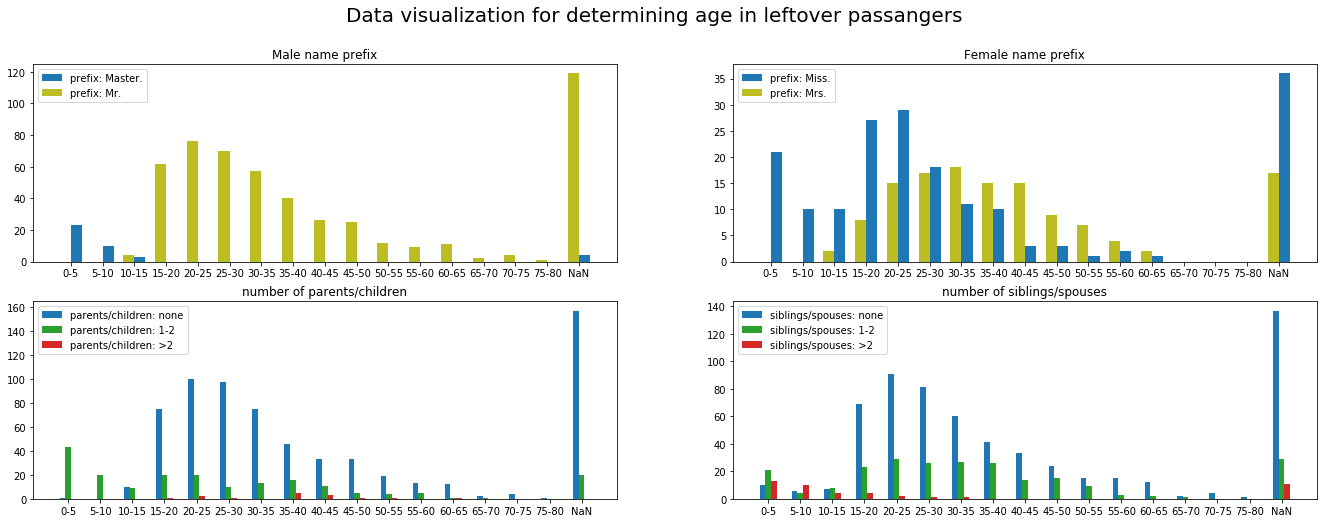

In [8]:
# DATA VISUALIZATION #3
# visualizing data to correctly determine missing age

fig, ax = plt.subplots(2, 2, figsize=(23,8))
fig.suptitle("Data visualization for determining age in leftover passangers", fontsize=20)

ax[0,0].bar(x + width/2, visData["prefix_master"], width, label="prefix: Master.", color="tab:blue")
ax[0,0].bar(x - width/2, visData["prefix_mr"], width, label="prefix: Mr.", color="tab:olive")
ax[0,0].set(title="Male name prefix", xticks=x, xticklabels=visData["labels"].values)
ax[0,0].legend()

ax[0,1].bar(x + width/2, visData["prefix_miss"], width, label="prefix: Miss.", color="tab:blue")
ax[0,1].bar(x - width/2, visData["prefix_ms"], width, label="prefix: Mrs.", color="tab:olive")
ax[0,1].set(title="Female name prefix", xticks=x, xticklabels=visData["labels"].values)
ax[0,1].legend()

ax[1,0].bar(x - width/2, visData["parents_none"], width/2, label="parents/children: none", color="tab:blue")
ax[1,0].bar(x, visData["parents_1-2"], width/2, label="parents/children: 1-2", color="tab:green")
ax[1,0].bar(x + width/2, visData["parents_>2"], width/2, label="parents/children: >2", color="tab:red")
ax[1,0].set(title="number of parents/children", xticks=x, xticklabels=visData["labels"].values)
ax[1,0].legend()

ax[1,1].bar(x - width/2, visData["siblings_none"], width/2, label="siblings/spouses: none", color="tab:blue")
ax[1,1].bar(x, visData["siblings_1-2"], width/2, label="siblings/spouses: 1-2", color="tab:green")
ax[1,1].bar(x + width/2, visData["siblings_>2"], width/2, label="siblings/spouses: >2", color="tab:red")
ax[1,1].set(title="number of siblings/spouses", xticks=x, xticklabels=visData["labels"].values)
ax[1,1].legend()

# clear unused variables
del x

In [9]:
# number of people without age in testing and training datasets
print("Number of people with unknown age (train dataset): " + str(len(trData[trData["Age"].isna()])))
print("Number of people with unknown age (test dataset): " + str(len(teData[teData["Age"].isna()])))

Number of people with unknown age (train dataset): 177
Number of people with unknown age (test dataset): 86


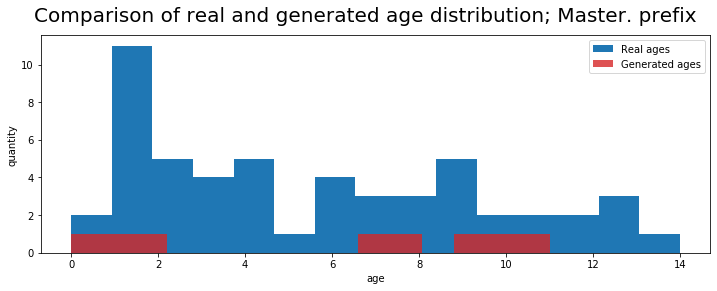

In [10]:
# DATA TREATMENT #2
# 1) age of all people with "master" prefix is < 15

# all people with "master"
# known age from testing data
mAge = trData["Age"][(trData["Name"].str.contains("Master.")) & trData["Age"].notna()]
# append "masters" from testing data
mAge = mAge.append(teData["Age"][(teData["Name"].str.contains("Master.")) & teData["Age"].notna()], ignore_index=True) 

# number of masters with unknown age 
unknown = len(trData[(trData["Name"].str.contains("Master.")) & trData["Age"].isna()])
unknown = unknown + len(teData[(teData["Name"].str.contains("Master.")) & teData["Age"].isna()])

# creating distribution (pandas dataframe, col1 = age, col2 = amount of people with said age)
mAge = mAge.round(decimals=0) # round to integer
df = pd.DataFrame({"age": np.sort(mAge.unique())})
# number of people with specific age
nPeople = np.empty(len(df["age"]))
for row in df.itertuples():
    nPeople[row[0]] = len(mAge[mAge == row[1]])
df["num_of_people"] = nPeople
# normalize number of people <0,1>, y in following calulcation
df["num_of_people"] = df["num_of_people"].div(np.max(df["num_of_people"]))

# generate new ages according to distribution (x = age, y = distribution (number of people))
generatedAge = np.ones(unknown)
generatedAge[:] = np.NaN
j = 0
# repeated until required amopunt of ages is generated
while np.isnan(generatedAge[-1]):
    # generated x (age), y (distribution result) pairs
    # generate according to ages in array
    x = npr.randint(0, high=np.max(df["age"]))
    # skip loop step if this age is not present
    if ~(df["age"].isin([x]).any()):
        continue
    y = npr.rand(1)
    # check if this pairs falls into the distribution
    if y <= (df.loc[df["age"] == x]["num_of_people"].item()):
        generatedAge[j] = x
        j += 1

# compare generated distribution with original distribution?
fig, ax = plt.subplots(figsize=(12,4))
fig.suptitle("Comparison of real and generated age distribution; Master. prefix", fontsize=20)
ax.hist(mAge, bins=len(df["age"]), label="Real ages")
ax.hist(generatedAge, bins=len(df["age"]), label="Generated ages", alpha=0.8, color="tab:red")
ax.set(xlabel="age", ylabel="quantity")
ax.legend()

# assign generated age to random ageless "master"
# training data
pId = trData.index[(trData["Name"].str.contains("Master.")) & (trData["Age"].isna())].tolist()
trLen = len(pId)
for i, val in enumerate(pId):
    trData.at[val,"Age"] = generatedAge[i]
# testing data
pId = teData.index[(teData["Name"].str.contains("Master.")) & (teData["Age"].isna())].tolist()
for i, val in enumerate(pId):
    teData.at[val,"Age"] = generatedAge[i+trLen]

# clear unused variables
del x, y, fig, ax, df, mAge, unknown, pId, trLen, i, val, j, nPeople, generatedAge

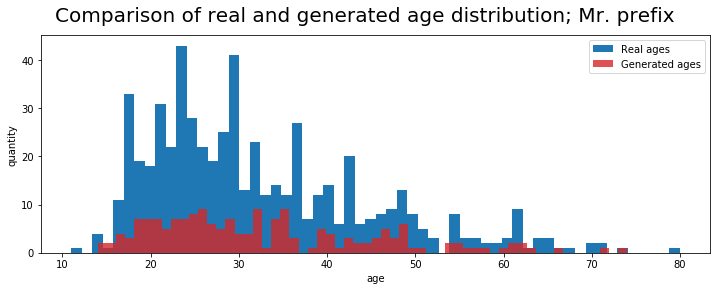

In [11]:
# DATA TREATMENT #3

# all people with "Mr"
# known age from testing data
mAge = trData["Age"][(trData["Name"].str.contains("Mr.")) & trData["Age"].notna() & (trData["Sex"]==0)]
# append "Mr." from testing data
mAge = mAge.append(teData["Age"][(teData["Name"].str.contains("Mr.")) & teData["Age"].notna() & (teData["Sex"]==0)], ignore_index=True) 

# number of masters with unknown age 
unknown = len(trData[(trData["Name"].str.contains("Mr.")) & trData["Age"].isna() & (trData["Sex"]==0)])
unknown = unknown + len(teData[(teData["Name"].str.contains("Mr.")) & teData["Age"].isna() & (teData["Sex"]==0)])

# creating distribution (pandas dataframe, col1 = age, col2 = amount of people with said age)
mAge = mAge.round(decimals=0) # round to integer
df = pd.DataFrame({"age": np.sort(mAge.unique())})
# number of people with specific age
nPeople = np.empty(len(df["age"]))
for row in df.itertuples():
    nPeople[row[0]] = len(mAge[mAge == row[1]])
df["num_of_people"] = nPeople
# normalize number of people <0,1>, y in following calulcation
df["num_of_people"] = df["num_of_people"].div(np.max(df["num_of_people"]))

# generate new ages according to distribution (x = age, y = distribution (number of people))
generatedAge = np.ones(unknown)
generatedAge[:] = np.NaN
j = 0
# repeated until required amopunt of ages is generated
while np.isnan(generatedAge[-1]):
    # generated x (age), y (distribution result) pairs
    # generate according to ages in array
    x = npr.randint(0, high=np.max(df["age"]))
    # skip loop step if this age is not present
    if ~(df["age"].isin([x]).any()):
        continue
    y = npr.rand(1)
    # check if this pairs falls into the distribution
    if y <= (df.loc[df["age"] == x]["num_of_people"].item()):
        generatedAge[j] = x
        j += 1

# compare generated distribution with original distribution
fig, ax = plt.subplots(figsize=(12,4))
fig.suptitle("Comparison of real and generated age distribution; Mr. prefix", fontsize=20)
ax.hist(mAge, bins=len(df["age"]), label="Real ages")
ax.hist(generatedAge, bins=len(df["age"]), label="Generated ages", alpha=0.8, color="tab:red")
ax.set(xlabel="age", ylabel="quantity")
ax.legend()

# assign generated age to random ageless "mr"
# training data
pId = trData.index[(trData["Name"].str.contains("Mr.")) & (trData["Age"].isna()) & (trData["Sex"]==0)].tolist()
trLen = len(pId)
for i, val in enumerate(pId):
    trData.at[val,"Age"] = generatedAge[i]
# testing data
pId = teData.index[(teData["Name"].str.contains("Mr.")) & (teData["Age"].isna()) & (teData["Sex"]==0)].tolist()
for i, val in enumerate(pId):
    teData.at[val,"Age"] = generatedAge[i+trLen]

# # clear unused variables
del x, y, fig, ax, df, mAge, unknown, pId, trLen, i, val, j, nPeople, generatedAge

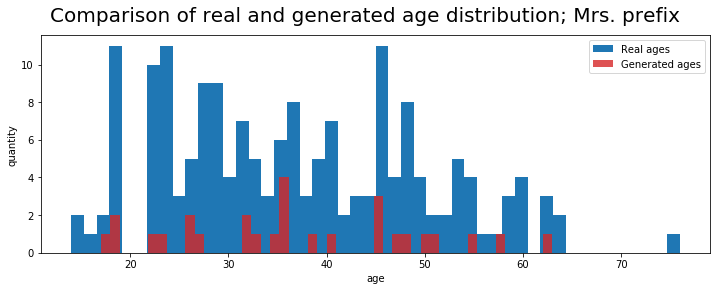

In [12]:
# DATA TREATMENT #4

# all people with "Mrs"
# known age from testing data
mAge = trData["Age"][(trData["Name"].str.contains("Mrs.")) & trData["Age"].notna()]
# append "Mr." from testing data
mAge = mAge.append(teData["Age"][(teData["Name"].str.contains("Mrs.")) & teData["Age"].notna()], ignore_index=True) 

# number of masters with unknown age 
unknown = len(trData[(trData["Name"].str.contains("Mrs.")) & trData["Age"].isna()])
unknown = unknown + len(teData[(teData["Name"].str.contains("Mrs.")) & teData["Age"].isna()])

# creating distribution (pandas dataframe, col1 = age, col2 = amount of people with said age)
mAge = mAge.round(decimals=0) # round to integer
df = pd.DataFrame({"age": np.sort(mAge.unique())})
# number of people with specific age
nPeople = np.empty(len(df["age"]))
for row in df.itertuples():
    nPeople[row[0]] = len(mAge[mAge == row[1]])
df["num_of_people"] = nPeople
# normalize number of people <0,1>, y in following calulcation
df["num_of_people"] = df["num_of_people"].div(np.max(df["num_of_people"]))

# generate new ages according to distribution (x = age, y = distribution (number of people))
generatedAge = np.ones(unknown+1) # +1 for that weird lady with Ms. prefix
generatedAge[:] = np.NaN
j = 0
# repeated until required amopunt of ages is generated
while np.isnan(generatedAge[-1]):
    # generated x (age), y (distribution result) pairs
    # generate according to ages in array
    x = npr.randint(0, high=np.max(df["age"]))
    # skip loop step if this age is not present
    if ~(df["age"].isin([x]).any()):
        continue
    y = npr.rand(1)
    # check if this pairs falls into the distribution
    if y <= (df.loc[df["age"] == x]["num_of_people"].item()):
        generatedAge[j] = x
        j += 1

# compare generated distribution with original distribution
fig, ax = plt.subplots(figsize=(12,4))
fig.suptitle("Comparison of real and generated age distribution; Mrs. prefix", fontsize=20)
ax.hist(mAge, bins=len(df["age"]), label="Real ages")
ax.hist(generatedAge, bins=len(df["age"]), label="Generated ages", alpha=0.8, color="tab:red")
ax.set(xlabel="age", ylabel="quantity")
ax.legend()

# assign generated age to random ageless "mrs"
# training data
pId = trData.index[(trData["Name"].str.contains("Mrs.")) & (trData["Age"].isna())].tolist()
trLen = len(pId)
for i, val in enumerate(pId):
    trData.at[val,"Age"] = generatedAge[i]
# testing data
pId = teData.index[(teData["Name"].str.contains("Mrs.")) & (teData["Age"].isna())].tolist()
for i, val in enumerate(pId):
    teData.at[val,"Age"] = generatedAge[i+trLen]
# That one lady with Ms. prefix
pId = teData.index[(teData["Name"].str.contains("Ms. Bridget")) & (teData["Age"].isna())].tolist()
teData.at[pId,"Age"] = generatedAge[-1]

# # clear unused variables
del x, y, fig, ax, df, mAge, unknown, pId, trLen, i, val, j, nPeople, generatedAge

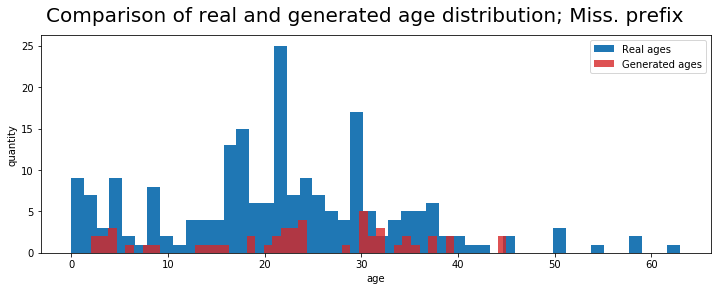

In [13]:
# DATA TREATMENT #5

# all people with "Miss"
# known age from testing data
mAge = trData["Age"][(trData["Name"].str.contains("Miss.")) & trData["Age"].notna()]
# append "Mr." from testing data
mAge = mAge.append(teData["Age"][(teData["Name"].str.contains("Miss.")) & teData["Age"].notna()], ignore_index=True) 

# number of masters with unknown age 
unknown = len(trData[(trData["Name"].str.contains("Miss.")) & trData["Age"].isna()])
unknown = unknown + len(teData[(teData["Name"].str.contains("Miss.")) & teData["Age"].isna()])

# creating distribution (pandas dataframe, col1 = age, col2 = amount of people with said age)
mAge = mAge.round(decimals=0) # round to integer
df = pd.DataFrame({"age": np.sort(mAge.unique())})
# number of people with specific age
nPeople = np.empty(len(df["age"]))
for row in df.itertuples():
    nPeople[row[0]] = len(mAge[mAge == row[1]])
df["num_of_people"] = nPeople
# normalize number of people <0,1>, y in following calulcation
df["num_of_people"] = df["num_of_people"].div(np.max(df["num_of_people"]))

# generate new ages according to distribution (x = age, y = distribution (number of people))
generatedAge = np.ones(unknown) 
generatedAge[:] = np.NaN
j = 0
# repeated until required amopunt of ages is generated
while np.isnan(generatedAge[-1]):
    # generated x (age), y (distribution result) pairs
    # generate according to ages in array
    x = npr.randint(0, high=np.max(df["age"]))
    # skip loop step if this age is not present
    if ~(df["age"].isin([x]).any()):
        continue
    y = npr.rand(1)
    # check if this pairs falls into the distribution
    if y <= (df.loc[df["age"] == x]["num_of_people"].item()):
        generatedAge[j] = x
        j += 1

# compare generated distribution with original distribution
fig, ax = plt.subplots(figsize=(12,4))
fig.suptitle("Comparison of real and generated age distribution; Miss. prefix", fontsize=20)
ax.hist(mAge, bins=len(df["age"]), label="Real ages")
ax.hist(generatedAge, bins=len(df["age"]), label="Generated ages", alpha=0.8, color="tab:red")
ax.set(xlabel="age", ylabel="quantity")
ax.legend()

# assign generated age to random ageless "Miss"
# training data
pId = trData.index[(trData["Name"].str.contains("Miss.")) & (trData["Age"].isna())].tolist()
trLen = len(pId)
for i, val in enumerate(pId):
    trData.at[val,"Age"] = generatedAge[i]
# testing data
pId = teData.index[(teData["Name"].str.contains("Miss.")) & (teData["Age"].isna())].tolist()
for i, val in enumerate(pId):
    teData.at[val,"Age"] = generatedAge[i+trLen]

# # clear unused variables
del x, y, fig, ax, df, mAge, unknown, pId, trLen, i, val, j, nPeople, generatedAge

In [14]:
# number of people without age in testing and training datasets
print("Number of people with unknown age (train dataset): " + str(len(trData[trData["Age"].isna()])))
print("Number of people with unknown age (test dataset): " + str(len(teData[teData["Age"].isna()])))

Number of people with unknown age (train dataset): 1
Number of people with unknown age (test dataset): 0


In [15]:
# DATA TREATMENT #6
# finishing data preparation for ML models
# creating dummy variables for embarkment
trData = trData.join(pd.get_dummies(trData["Embarked"]))
teData = teData.join(pd.get_dummies(trData["Embarked"]))

# getting rid of data containing NaNs 
trData = trData[(trData["Age"].notna()) & (trData["Embarked"].notna())]
teData = teData[(teData["Age"].notna()) & (teData["Embarked"].notna())]

# there is one person in teData who has NaN for fare 
# take everyone in same age (60+-5 years) and same class (3rd) and take mean value
farestr = trData[(trData["Age"]>55) & (trData["Age"]<65) & (trData["Pclass"]==3) & (trData["SibSp"]==0) & (trData["Parch"]==0)]
teData.at[152,"Fare"] = np.mean(farestr["Fare"])


# delete useless columns
ids = teData["PassengerId"] # keep ids for later
trData = trData.drop(columns=["PassengerId","Name","Ticket","Cabin","Embarked"])
teData = teData.drop(columns=["PassengerId","Name","Ticket","Cabin","Embarked"])

# scale the data using standard scaler
# important for some models
from sklearn.preprocessing import StandardScaler

# setup scaler
scaler = StandardScaler()
scaler.fit(trData.drop(columns="Survived"))
trainX = scaler.transform(trData.drop(columns="Survived"))
trainY = trData["Survived"]
testX = scaler.transform(teData)

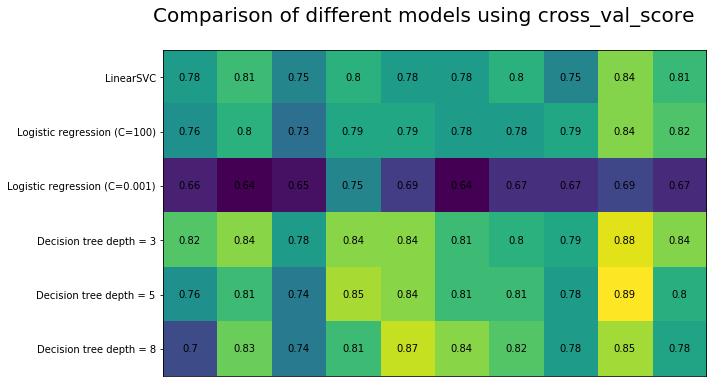

In [16]:
# MODEL TEST 
# using cross validation from sklearn

# imports
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# prepare vector for scores
scores = np.empty([6,10])

# use cross validation 
scores[0,:] = cross_val_score(LinearSVC(random_state=42, max_iter=10000), trainX, trainY, cv=10)
scores[1,:] = cross_val_score(LogisticRegression(C=100, max_iter=100), trainX, trainY, cv=10)
scores[2,:] = cross_val_score(LogisticRegression(C=0.001, max_iter=100), trainX, trainY, cv=10)
scores[3,:] = cross_val_score(DecisionTreeClassifier(max_depth=3), trainX, trainY, cv=10)
scores[4,:] = cross_val_score(DecisionTreeClassifier(max_depth=5), trainX, trainY, cv=10)
scores[5,:] = cross_val_score(DecisionTreeClassifier(max_depth=8), trainX, trainY, cv=10)

# names of models for xticks
models = ["LinearSVC", "Logistic regression (C=100)", "Logistic regression (C=0.001)", "Decision tree depth = 3", "Decision tree depth = 5", "Decision tree depth = 8"]

# plot results
fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle("Comparison of different models using cross_val_score", fontsize=20)
ax.imshow(scores)
ax.set(yticks=np.arange(len(models)), yticklabels=models, xticks=([]))
# write the score into the heatmap
for i in range(scores.shape[0]):
    for j in range(scores.shape[1]):
        ax.text(j, i, np.round(scores[i, j],2), ha="center", va="center", color="k")

# clear variables
del scores, models, fig, ax, i, j, trainX, trainY, testX, scaler

In [66]:
# FINAL MODEL testing
# random forest

# imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# random forest doesnt require scalling, let's take normal data
dataX = trData.drop(columns="Survived")
dataY = trData["Survived"]

# split dataS
trX, teX, trY, teY = train_test_split(dataX, dataY)

forest = RandomForestClassifier(n_estimators=100, max_depth=5, max_features='sqrt', random_state=0)
forest.fit(trX, trY)
randPred = forest.predict(teX)

# gradient = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=0)
# gradient.fit(trX, trY)
# gradPred = gradient.predict(teX)


print("Random f1 on test set: {:.3f}".format(f1_score(teY, randPred)))
# print("Gradient f1 on training set: {:.3f}".format(f1_score(teY, gradPred)))
print("Random on test set: {:.3f}".format(forest.score(teX, teY)))
print("Random on training set: {:.3f}".format(forest.score(trX, trY)))

del forest

Random f1 on test set: 0.734
Random on test set: 0.811
Random on training set: 0.869


In [43]:
# FINAL MODEL

# what next
# 1) parameters scan (how to optimize rfc?)
# 2) proper scoring, false positives and others

forest = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=3, random_state=0)
forest.fit(dataX, dataY)

result = forest.predict(teData)
proba = forest.predict_proba(teData)

submission = pd.DataFrame({"PassengerId": ids, "Survived": result})

In [44]:
submission.to_csv("out.csv", index=False)

In [54]:
last = pd.read_csv("out.csv")
last2 = pd.read_csv("out-200715.csv")
last["Survived2"] = last2["Survived"]